<a href="https://colab.research.google.com/github/divsal009/div/blob/master/MRI_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from google.colab.patches import cv2_imshow


In [127]:
# Deep Learning 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout, ZeroPadding2D

In [128]:
os.listdir('/content/drive/My Drive/Medical Data/brain_tumor_dataset/')


['yes', 'no']

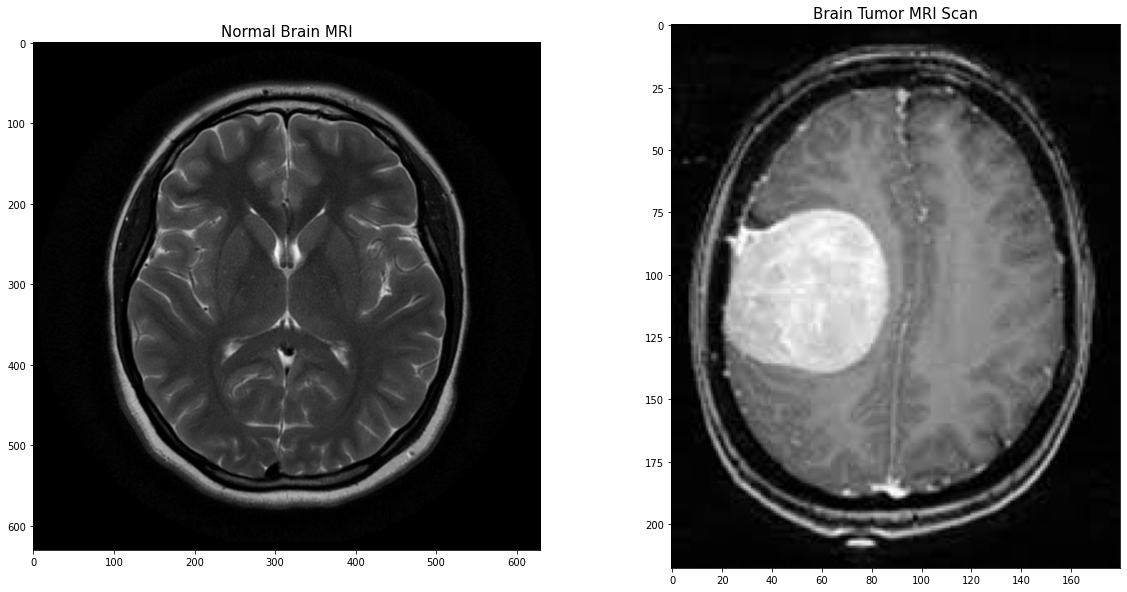

In [129]:
# Open & Read MRI Scan Image
normal_image = Image.open('/content/drive/My Drive/Medical Data/brain_tumor_dataset/no/1 no.jpeg')
tumor_image = Image.open('/content/drive/My Drive/Medical Data/brain_tumor_dataset/yes/Y1.jpg')

# Lets plot both Images using Subplotting
fig = plt.figure(figsize=(20,10))
a1 = fig.add_subplot(1, 2, 1)
img_plot = plt.imshow(normal_image, cmap = 'gray')
a1.set_title("Normal Brain MRI", fontsize = 15)

a1 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(tumor_image, cmap = 'gray')
a1.set_title("Brain Tumor MRI Scan", fontsize = 15)
plt.show()


In [130]:
yes=os.listdir('/content/drive/My Drive/Medical Data/brain_tumor_dataset/yes')

In [131]:
no=os.listdir('/content/drive/My Drive/Medical Data/brain_tumor_dataset/no')

In [132]:
data=np.concatenate([yes,no])

In [133]:
data

array(['Y100.JPG', 'Y10.jpg', 'Y1.jpg', 'Y101.jpg', 'Y104.jpg',
       'Y106.jpg', 'Y105.jpg', 'Y102.jpg', 'Y103.jpg', 'Y111.JPG',
       'Y109.JPG', 'Y107.jpg', 'Y112.JPG', 'Y108.jpg', 'Y113.JPG',
       'Y11.jpg', 'Y116.JPG', 'Y12.jpg', 'Y13.jpg', 'Y114.JPG',
       'Y120.JPG', 'Y115.JPG', 'Y117.JPG', 'Y15.jpg', 'Y148.JPG',
       'Y14.jpg', 'Y147.JPG', 'Y153.jpg', 'Y146.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y155.JPG', 'Y158.JPG', 'Y156.JPG', 'Y154.jpg',
       'Y157.JPG', 'Y164.JPG', 'Y162.jpg', 'Y165.JPG', 'Y160.JPG',
       'Y167.JPG', 'Y168.jpg', 'Y161.JPG', 'Y166.JPG', 'Y163.JPG',
       'Y170.JPG', 'Y180.jpg', 'Y183.jpg', 'Y182.JPG', 'Y181.jpg',
       'Y169.jpg', 'Y18.JPG', 'Y17.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y188.jpg', 'Y19.JPG', 'Y187.jpg', 'Y186.jpg', 'Y194.jpg',
       'Y195.JPG', 'Y21.jpg', 'Y20.jpg', 'Y193.JPG', 'Y2.jpg', 'Y192.JPG',
       'Y242.JPG', 'Y244.JPG', 'Y24.jpg', 'Y22.jpg', 'Y23.JPG',
       'Y243.JPG', 'Y245.jpg', 'Y248.JPG', 'Y246.JPG', 'Y249.JPG',
  

# **change yes to 1 and no to 0**

In [134]:
target_x=np.full(len(yes),1)

In [135]:
target_y=np.full(len(no),0)

In [136]:
target_x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [137]:
target_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
data_target=np.concatenate([target_x,target_y])

In [139]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
img=cv2.imread('/content/drive/My Drive/Medical Data/brain_tumor_dataset/yes/Y1.jpg')

In [141]:
img

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]]], dtype=uint8)

In [142]:
mri=cv2.resize(img,(100,100))

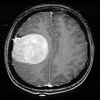

In [143]:
cv2_imshow(mri)

In [144]:
cv2.split(mri)

[array([[3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        ...,
        [3, 3, 3, ..., 2, 2, 3],
        [2, 2, 2, ..., 2, 2, 3],
        [2, 2, 2, ..., 2, 1, 1]], dtype=uint8), array([[3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        ...,
        [3, 3, 3, ..., 2, 2, 3],
        [2, 2, 2, ..., 2, 2, 3],
        [2, 2, 2, ..., 2, 1, 1]], dtype=uint8), array([[3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        ...,
        [3, 3, 3, ..., 2, 2, 3],
        [2, 2, 2, ..., 2, 2, 3],
        [2, 2, 2, ..., 2, 1, 1]], dtype=uint8)]

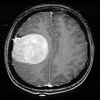

In [145]:
#computer vision reads image data in to BGR format(Transformation)
b, g, r = cv2.split(mri)
img=cv2.merge([r,g,b])
cv2_imshow(img)

In [146]:
X_data = []
yes = os.listdir('/content/drive/My Drive/Medical Data/brain_tumor_dataset/yes/') 
for file in yes:
  img = cv2.imread('/content/drive/My Drive/Medical Data/brain_tumor_dataset/yes/' + file)
  mri = cv2.resize(img, (32, 32))
  # computer vision reads the image data into B, G, R format
  b, g, r = cv2.split(mri)
  img = cv2.merge([r, g, b])
  X_data.append(img)
  

In [147]:
X_data

[array([[[0, 0, 0],
         [0, 0, 0],
         [3, 3, 3],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [2, 2, 2],
         [3, 3, 3],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [2, 2, 2],
         [4, 4, 4],
         ...,
         [3, 3, 3],
         [2, 2, 2],
         [0, 0, 0]],
 
        ...,
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[2, 2, 2],
         [1, 1, 1],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=uint8), array([[[23, 23, 23],
         [29, 29, 29],
         [29, 29, 29],
         ...,
         [24, 24, 24],
         [25, 25, 25],
         [23, 23, 23]]

In [148]:
no = os.listdir('/content/drive/My Drive/Medical Data/brain_tumor_dataset/no/')
for file in no:
  img = cv2.imread('/content/drive/My Drive/Medical Data/brain_tumor_dataset/no/' + file)
  mri = cv2.resize(img, (32, 32))
  # computer vision reads the image data into B, G, R format
  b, g, r = cv2.split(mri)
  img = cv2.merge([r, g, b])
  X_data.append(img)
  

In [149]:
#To covert listdata into array
X=np.squeeze(X_data)

In [150]:
X

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 3,  3,  3],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 2,  2,  2],
         [ 3,  3,  3],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 2,  2,  2],
         [ 4,  4,  4],
         ...,
         [ 3,  3,  3],
         [ 2,  2,  2],
         [ 0,  0,  0]],

        ...,

        [[ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2]],

        [[ 2,  2,  2],
         [ 1,  1,  1],
         [ 2,  2,  2],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 1,  1,  1]],

        [[ 1,  1,  1],
         [ 2,  2,  2],
         [ 2,  2,  2],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]]],


       [[[23, 23, 23],
         [29, 29, 29],
         [29, 

In [151]:
X.shape

(253, 32, 32, 3)

## **Normalization** (After normalization pixel range in between 0 and 1)


In [152]:
X=X.astype('float32')
X/=255

In [153]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]

# **Train and Test data**

In [154]:
from sklearn.model_selection import train_test_split


In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, data_target, test_size = 0.1, random_state = 3)

In [156]:

# training & validation 
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 3)


In [157]:
x_train2.shape 

(192, 32, 32, 3)

# **CNN MODEL**

In [158]:
def build_model():
  # Input Layer
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='same', input_shape = (32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  
  # Flatten 
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units= 512, activation='relu'))
  # Output Layer - 
  model.add(Dense(1, activation='sigmoid'))

  # Model optimizers 
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model
  


In [159]:
model = build_model()

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)         

In [160]:
history =  model.fit(x_train2, y_train2, batch_size=64, epochs=175, validation_data=(x_val, y_val))

Train on 192 samples, validate on 35 samples
Epoch 1/175
192/192 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.5365 - val_loss: 0.6448 - val_accuracy: 0.6286
Epoch 2/175
192/192 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.6562 - val_loss: 0.6471 - val_accuracy: 0.6286
Epoch 3/175
192/192 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.6823 - val_loss: 0.6021 - val_accuracy: 0.6286
Epoch 4/175
192/192 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6354 - val_loss: 0.5794 - val_accuracy: 0.6857
Epoch 5/175
192/192 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.6823 - val_loss: 0.5744 - val_accuracy: 0.8000
Epoch 6/175
192/192 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7135 - val_loss: 0.5352 - val_accuracy: 0.7714
Epoch 7/175
192/192 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.7

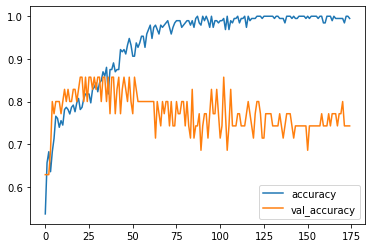

In [162]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

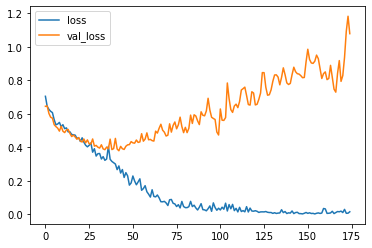

In [163]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [164]:
score=model.evaluate(x_test,y_test)

26/26 [==============================] - 0s 680us/step


In [165]:
#accuracy
score[1]

0.6538461446762085

# **Classification Metrics**

In [166]:
predictions=model.predict(x_test)

In [167]:
predictions

array([[9.0490007e-01],
       [1.0000000e+00],
       [2.1809161e-02],
       [7.8162336e-01],
       [7.1415305e-04],
       [2.5661237e-07],
       [9.9032581e-01],
       [9.1158295e-01],
       [3.7522888e-01],
       [6.5690202e-01],
       [9.7460437e-01],
       [1.7574461e-08],
       [9.4260526e-01],
       [9.0189451e-01],
       [9.9999058e-01],
       [3.7334082e-01],
       [9.9994731e-01],
       [4.6321507e-09],
       [2.2618455e-01],
       [1.0038018e-01],
       [9.9858880e-01],
       [1.5016288e-01],
       [4.5363766e-01],
       [9.9792194e-01],
       [7.8761947e-01],
       [9.9997854e-01]], dtype=float32)

In [168]:
from sklearn.metrics import confusion_matrix
predictions = np.round(predictions) 
from sklearn.metrics import confusion_matrix 
confusion_mtx = confusion_matrix(y_test, predictions) 
confusion_mtx



array([[ 4,  2],
       [ 7, 13]])

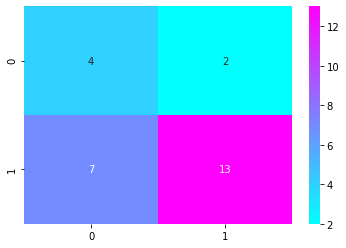

In [170]:
sns.heatmap(confusion_mtx, annot = True,cmap='cool')


In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))







              precision    recall  f1-score   support

           0       0.36      0.67      0.47         6
           1       0.87      0.65      0.74        20

    accuracy                           0.65        26
   macro avg       0.62      0.66      0.61        26
weighted avg       0.75      0.65      0.68        26



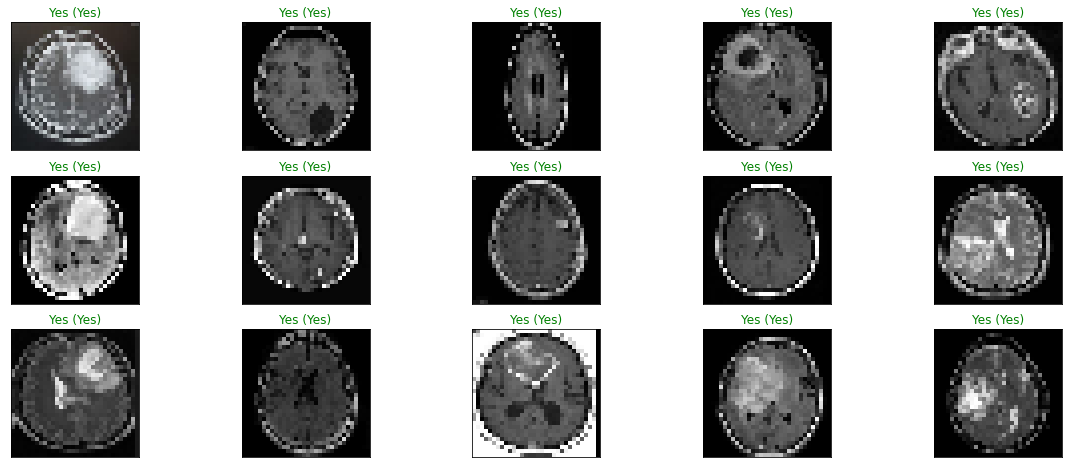

In [172]:
labels = ["Yes", "No"]
y_hat = model.predict(x_test)

# Plot A random sample of 15 test datasets, their predicted labels and actual o/p
figure = plt.figure(figsize = (20,8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size = 15, replace=False)):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  # display test image using plt
  ax.imshow(np.squeeze(x_test[index]))
  # Predicted o/p
  predicted_index = np.argmax(y_hat[index])
  # actual value
  true_index = np.argmax(y_test[index])
  ax.set_title("{} ({})".format(labels[predicted_index], 
                                  labels[true_index]),
                                  color=("green" if predicted_index == true_index else "red"))
plt.show()




## **Make prediction for new MRI data** **bold text**


In [173]:
X_data_new = []

img = cv2.imread('/content/drive/My Drive/Medical Data/brain_tumor_dataset/yes/Y108.jpg')
mri = cv2.resize(img, (32, 32))
# computer vision reads the image data into B, G, R format
b, g, r = cv2.split(mri)
img = cv2.merge([r, g, b])
X_data_new.append(img)

In [175]:
X_new = np.squeeze(X_data_new)
X_new.shape



(32, 32, 3)

In [176]:
x_test.shape
X_new = X_new.reshape(1, 32, 32, 3)
X_new.shape

(1, 32, 32, 3)

In [178]:

X_new = X_new.astype('float32')
X_new /= 255 

In [179]:
yhat_p_new = model.predict(X_new)


In [180]:
np.round(yhat_p_new)        # MRI TESTED POSITIVE FOR TUMOR


array([[0.]], dtype=float32)